In [8]:
# 1. IMPORT PUSTAKA YANG DIBUTUHKAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, ConfusionMatrixDisplay, RocCurveDisplay
)

# --- 2. MEMUAT DAN INSPEKSI DATA ---
# Ganti 'calonpembelimobil.csv' dengan path file Anda jika perlu
df = pd.read_csv('../data/calonpembelimobil.csv')

In [9]:

print("--- Informasi Awal Data ---")
df.info()

--- Informasi Awal Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [10]:

print("\n--- 5 Baris Pertama Data ---")
print(df.head())


--- 5 Baris Pertama Data ---
   ID  Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Beli_Mobil
0   1    32       1        0               0          240           1
1   2    49       2        1               1          100           0
2   3    52       1        0               2          250           1
3   4    26       2        1               1          130           0
4   5    45       3        0               2          237           1


In [11]:

print("\n--- Pengecekan Data Kosong & Duplikat ---")
print("Data Kosong:\n", df.isnull().sum())


--- Pengecekan Data Kosong & Duplikat ---
Data Kosong:
 ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


In [12]:
# Grafik lainnya...
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<Figure size 640x480 with 0 Axes>

In [13]:
# --- 4. PERSIAPAN DATA DAN PEMODELAN ---
X = df.drop('Beli_Mobil', axis=1)
y = df['Beli_Mobil']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
numerical_features = ['Usia', 'Penghasilan']
categorical_features = ['Kelamin', 'Status', 'Memiliki_Mobil']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

# --- 5. MELATIH MODEL ---
model.fit(X_train, y_train)
print("\nModel Regresi Logistik berhasil dilatih!")



Model Regresi Logistik berhasil dilatih!


In [15]:
# --- 6. EVALUASI MODEL ---
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n--- Metrik Evaluasi Model ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("\n--- Laporan Klasifikasi ---")
print(classification_report(y_test, y_pred, target_names=['Tidak Beli', 'Beli']))



--- Metrik Evaluasi Model ---
Akurasi: 0.9100
ROC-AUC: 0.9742

--- Laporan Klasifikasi ---
              precision    recall  f1-score   support

  Tidak Beli       0.83      0.95      0.88        73
        Beli       0.97      0.89      0.93       127

    accuracy                           0.91       200
   macro avg       0.90      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200



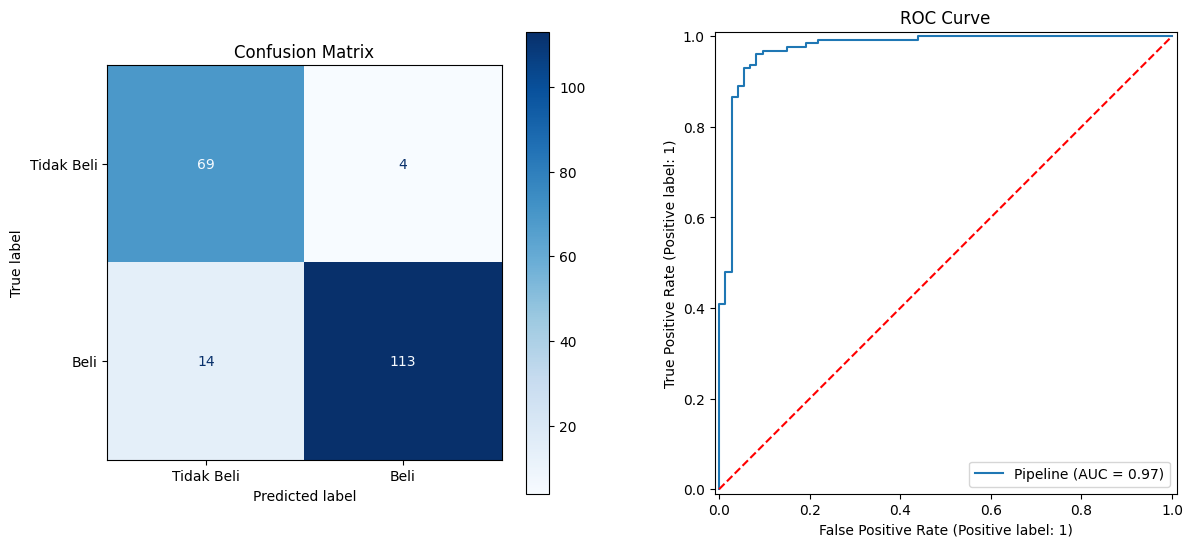

In [16]:
# Visualisasi Confusion Matrix dan ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Tidak Beli', 'Beli'], cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix')
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax2)
ax2.set_title('ROC Curve')
ax2.plot([0, 1], [0, 1], 'r--')
plt.show()


In [17]:

# --- 7. INTERPRETASI MODEL ---
cat_feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)
coefficients = model.named_steps['classifier'].coef_[0]
odds_ratios = np.exp(coefficients)

coef_df = pd.DataFrame({
    'Fitur': all_feature_names,
    'Odds Ratio': odds_ratios
}).sort_values('Odds Ratio', ascending=False)

print("\n--- Interpretasi Pengaruh Fitur (Odds Ratio) ---")
print(coef_df)


--- Interpretasi Pengaruh Fitur (Odds Ratio) ---
               Fitur  Odds Ratio
1        Penghasilan  103.797316
2          Kelamin_0    1.772112
10  Memiliki_Mobil_2    1.728411
9   Memiliki_Mobil_1    1.646746
5           Status_1    1.320646
8   Memiliki_Mobil_0    1.294286
4           Status_0    1.237104
7           Status_3    1.224702
12  Memiliki_Mobil_4    1.000568
0               Usia    0.964031
3          Kelamin_1    0.564691
6           Status_2    0.500125
11  Memiliki_Mobil_3    0.271488
